<a href="https://colab.research.google.com/github/juanpaat/LungCanderPrediction-ML/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Prediction using ML

About Dataset
This dataset helps understand and predict lung cancer risks based on health, environment, and lifestyle factors. It includes details about smoking habits, pollution exposure, healthcare access, and survival chances.  
Doctors, researchers, and data scientists can use it to find patterns in lung cancer cases and improve early detection.  
Columns Breakdown (25 Features)  
*  **Country** – The country where the patient resides
*  **Age** – Patient’s age (randomized between 30-90)
*  **Gender** – Male/Female
*  **Smoking_Status** – Smoker, Non-Smoker, Former Smoker
*  **Second_Hand_Smoke** – Yes/No
*  **Air_Pollution_Exposure** – Low, Medium, High
*  **Occupation_Exposure** – Yes/No (Factory, Mining, etc.)
*  **Rural_or_Urban** – Rural/Urban
*  **Socioeconomic_Status** – Low, Middle, High
*  **Healthcare_Access** – Good, Limited, Poor
*  **Insurance_Coverage** – Yes/No
*  **Screening_Availability** – Yes/No
*  **Stage_at_Diagnosis** – I, II, III, IV
*  **Cancer_Type** – NSCLC, SCLC
*  **Mutation_Type** – EGFR, ALK, KRAS, None
*  **Treatment_Access** – Full, Partial, None
*  **Clinical_Trial_Access** – Yes/No
*  **Language_Barrier** – Yes/No
*  **Mortality_Risk** – Probability (0.0 - 1.0)
*  **5_Year_Survival_Probability** – Probability (0.0 - 1.0)
*  **Delay_in_Diagnosis** – Yes/No
*  **Family_History** – Yes/No
*  **Indoor_Smoke_Exposure** – Yes/No
*  **Tobacco_Marketing_Exposure** – Yes/No
*  **Final_Prediction** – Lung Cancer (Yes/No)

In [ ]:
import pandas as pd
from time import time
initial_time = time()

In [ ]:
path = 'lung_cancer_prediction.csv'

In [ ]:
raw_data = pd.read_csv(path)
raw_data

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Treatment_Access,Clinical_Trial_Access,Language_Barrier,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction
0,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,...,Partial,Yes,No,0.263278,0.797576,Yes,No,No,No,No
1,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,...,Partial,Yes,No,0.154697,0.336674,Yes,No,No,Yes,No
2,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,...,Partial,Yes,No,0.607435,0.063621,No,No,No,Yes,No
3,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,...,Full,No,No,0.081184,0.336814,No,No,No,Yes,No
4,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,...,Full,No,No,0.643276,0.820103,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460287,Russia,46,Female,Former Smoker,Yes,Medium,No,Urban,Middle,Poor,...,Partial,No,No,0.794849,0.521195,No,No,No,No,Yes
460288,Pakistan,63,Female,Non-Smoker,No,Low,No,Urban,Middle,Good,...,Partial,No,No,0.198008,0.907028,No,No,No,No,Yes
460289,Germany,51,Female,Smoker,No,Low,No,Urban,High,Poor,...,Partial,No,No,0.491532,0.866276,Yes,Yes,No,Yes,No
460290,Italy,83,Female,Former Smoker,No,Low,No,Urban,Middle,Good,...,Full,No,No,0.077730,0.610409,No,No,No,No,Yes


In [ ]:
raw_data.shape

(460292, 25)

In [ ]:
raw_data.columns

Index(['Country', 'Age', 'Gender', 'Smoking_Status', 'Second_Hand_Smoke',
       'Air_Pollution_Exposure', 'Occupation_Exposure', 'Rural_or_Urban',
       'Socioeconomic_Status', 'Healthcare_Access', 'Insurance_Coverage',
       'Screening_Availability', 'Stage_at_Diagnosis', 'Cancer_Type',
       'Mutation_Type', 'Treatment_Access', 'Clinical_Trial_Access',
       'Language_Barrier', 'Mortality_Risk', '5_Year_Survival_Probability',
       'Delay_in_Diagnosis', 'Family_History', 'Indoor_Smoke_Exposure',
       'Tobacco_Marketing_Exposure', 'Final_Prediction'],
      dtype='object')

In [ ]:
raw_data.Final_Prediction.value_counts()

No     368107
Yes     92185
Name: Final_Prediction, dtype: int64

<AxesSubplot: >

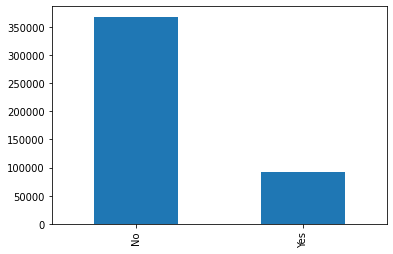

In [ ]:
raw_data.Final_Prediction.value_counts().plot.bar()

In [ ]:
raw_data['Final_Prediction'].dtype

dtype('O')

In [ ]:
raw_data['Air_Pollution_Exposure'].value_counts()

Low       184578
Medium    184065
High       91649
Name: Air_Pollution_Exposure, dtype: int64

In [ ]:
raw_data['Tobacco_Marketing_Exposure'].unique()


array(['No', 'Yes'], dtype=object)

In [ ]:
# Ordinal Encoding
raw_data['Final_Prediction'] = raw_data['Final_Prediction'].map({'No' : 0, 'Yes': 1})
raw_data['Gender'] = raw_data['Gender'].map({'Male' : 1 , 'Female' : 0})
raw_data['Smoking_Status'] = raw_data['Smoking_Status'].map({'Former Smoker' : 1 , 'Non-Smoker' : 0, 'Smoker': 2})
raw_data['Second_Hand_Smoke'] = raw_data['Second_Hand_Smoke'].map({'No' : 1 , 'Yes' : 0})
raw_data['Air_Pollution_Exposure'] = raw_data['Air_Pollution_Exposure'].map({'Low' : 0 , 'Medium' : 1, 'High': 2})
raw_data['Occupation_Exposure'] = raw_data['Occupation_Exposure'].map({'No' : 0, 'Yes': 1})
raw_data['Rural_or_Urban'] = raw_data['Rural_or_Urban'].map({'Urban' : 1, 'Rural': 0})
raw_data['Socioeconomic_Status'] = raw_data['Socioeconomic_Status'].map({'Low' : 0 , 'Middle' : 1, 'High': 2})
raw_data['Healthcare_Access'] = raw_data['Healthcare_Access'].map({'Poor' : 0 , 'Limited' : 1, 'Good': 2})
raw_data['Insurance_Coverage'] = raw_data['Insurance_Coverage'].map({'No' : 0, 'Yes': 1})
raw_data['Screening_Availability'] = raw_data['Screening_Availability'].map({'No' : 0, 'Yes': 1})
raw_data['Stage_at_Diagnosis'] = raw_data['Stage_at_Diagnosis'].map({'I' : 0 , 'II' : 1, 'III': 2, 'IV':3})
raw_data['Cancer_Type'] = raw_data['Cancer_Type'].map({'NSCLC' : 0 , 'SCLC' : 1})
raw_data['Treatment_Access'] = raw_data['Treatment_Access'].map({'None' : 0 , 'Partial' : 1, 'Full': 2})
raw_data['Clinical_Trial_Access'] = raw_data['Clinical_Trial_Access'].map({'No' : 0, 'Yes': 1})
raw_data['Language_Barrier'] = raw_data['Language_Barrier'].map({'No' : 0, 'Yes': 1})
raw_data['Delay_in_Diagnosis'] = raw_data['Delay_in_Diagnosis'].map({'No' : 0, 'Yes': 1})
raw_data['Family_History'] = raw_data['Family_History'].map({'No' : 0, 'Yes': 1})
raw_data['Indoor_Smoke_Exposure'] = raw_data['Indoor_Smoke_Exposure'].map({'No' : 0, 'Yes': 1})
raw_data['Tobacco_Marketing_Exposure'] = raw_data['Tobacco_Marketing_Exposure'].map({'No' : 0, 'Yes': 1})


In [ ]:
# One Hot Encoding

# Using pandas
# Specify the columns you wish to one-hot encode
categorical_columns = ["Mutation_Type"]

# Perform the one-hot encoding
raw_data = pd.get_dummies(raw_data, columns= categorical_columns, drop_first=True)

# View the resulting DataFrame
raw_data

,Country,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,...,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction,Mutation_Type_EGFR,Mutation_Type_KRAS,Mutation_Type_None
0,Russia,82,1,1,0,1,0,1,2,1,...,0.263278,0.797576,1,0,0,0,0,1,0,0
1,Thailand,66,0,1,1,2,0,0,1,2,...,0.154697,0.336674,1,0,0,1,0,1,0,0
2,Colombia,87,1,1,1,1,0,1,0,0,...,0.607435,0.063621,0,0,0,1,0,0,0,0
3,Egypt,51,0,1,1,0,1,0,2,2,...,0.081184,0.336814,0,0,0,1,0,1,0,0
4,DR Congo,43,1,1,1,2,0,1,1,2,...,0.643276,0.820103,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460287,Russia,46,0,1,0,1,0,1,1,0,...,0.794849,0.521195,0,0,0,0,1,1,0,0
460288,Pakistan,63,0,0,1,0,0,1,1,2,...,0.198008,0.907028,0,0,0,0,1,1,0,0
460289,Germany,51,0,2,1,0,0,1,2,0,...,0.491532,0.866276,1,1,0,1,0,1,0,0
460290,Italy,83,0,1,1,0,0,1,1,2,...,0.077730,0.610409,0,0,0,0,1,0,1,0


In [ ]:
raw_data.isnull().sum()

Country                        0
Age                            0
Gender                         0
Smoking_Status                 0
Second_Hand_Smoke              0
Air_Pollution_Exposure         0
Occupation_Exposure            0
Rural_or_Urban                 0
Socioeconomic_Status           0
Healthcare_Access              0
Insurance_Coverage             0
Screening_Availability         0
Stage_at_Diagnosis             0
Cancer_Type                    0
Treatment_Access               0
Clinical_Trial_Access          0
Language_Barrier               0
Mortality_Risk                 0
5_Year_Survival_Probability    0
Delay_in_Diagnosis             0
Family_History                 0
Indoor_Smoke_Exposure          0
Tobacco_Marketing_Exposure     0
Final_Prediction               0
Mutation_Type_EGFR             0
Mutation_Type_KRAS             0
Mutation_Type_None             0
dtype: int64

In [ ]:
raw_data.groupby(['Country']).mean()['Final_Prediction']

Country
Bangladesh      0.196850
Brazil          0.195583
China           0.201125
Colombia        0.197064
DR Congo        0.200954
Egypt           0.197570
Ethiopia        0.205464
France          0.198280
Germany         0.198781
India           0.204043
Indonesia       0.194189
Iran            0.202634
Italy           0.196208
Japan           0.204727
Kenya           0.198890
Mexico          0.198934
Myanmar         0.205861
Nigeria         0.194446
Pakistan        0.199856
Philippines     0.196197
Russia          0.201318
South Africa    0.208094
South Korea     0.209659
Spain           0.197093
Tanzania        0.195769
Thailand        0.205677
Turkey          0.200857
UK              0.197586
USA             0.203623
Vietnam         0.200339
Name: Final_Prediction, dtype: float64

In [ ]:
# Target Encoder
class TargetEncoder:
    def fit(self, train_df, target_col, categ_col):
        """
        Computes the mean target value for each category and stores it in a dictionary.
        """
        self.target_col = target_col            # Stores the target
        self.categ_col = categ_col              # Stores the categorical column (to be encoded)
        self.target_encoder = train_df.groupby(categ_col)[target_col].mean().to_dict()      # Stores the frequencies as a dictionary


    def transform(self, test_df,  column=None):
        """
        Replaces categorical values in test_df[column] with their target encoding.
        If a category is not seen during training, assigns the global mean.
        """
        if column is None:
            column = self.categ_col

        # Handle unseen categories with the global mean
        global_mean = sum(self.target_encoder.values()) / len(self.target_encoder)

        col_name = column + '_target_enc'
        test_df.loc[:, col_name] = test_df[column].apply(lambda x: self.target_encoder.get(x, global_mean))
        test_df = test_df.drop(self.categ_col, axis = 1)

        return test_df


te = TargetEncoder()
te.fit(raw_data, target_col = 'Final_Prediction', categ_col = 'Country')

raw_data = te.transform(raw_data)


In [ ]:
raw_data

,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,Insurance_Coverage,...,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction,Mutation_Type_EGFR,Mutation_Type_KRAS,Mutation_Type_None,Country_target_enc
0,82,1,1,0,1,0,1,2,1,1,...,0.797576,1,0,0,0,0,1,0,0,0.201318
1,66,0,1,1,2,0,0,1,2,0,...,0.336674,1,0,0,1,0,1,0,0,0.205677
2,87,1,1,1,1,0,1,0,0,0,...,0.063621,0,0,0,1,0,0,0,0,0.197064
3,51,0,1,1,0,1,0,2,2,0,...,0.336814,0,0,0,1,0,1,0,0,0.197570
4,43,1,1,1,2,0,1,1,2,1,...,0.820103,0,0,0,0,0,0,0,1,0.200954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460287,46,0,1,0,1,0,1,1,0,1,...,0.521195,0,0,0,0,1,1,0,0,0.201318
460288,63,0,0,1,0,0,1,1,2,0,...,0.907028,0,0,0,0,1,1,0,0,0.199856
460289,51,0,2,1,0,0,1,2,0,1,...,0.866276,1,1,0,1,0,1,0,0,0.198781
460290,83,0,1,1,0,0,1,1,2,1,...,0.610409,0,0,0,0,1,0,1,0,0.196208


In [ ]:
raw_data.describe()

,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,Insurance_Coverage,...,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Final_Prediction,Mutation_Type_EGFR,Mutation_Type_KRAS,Mutation_Type_None,Country_target_enc
count,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,...,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000,460292.000000
mean,60.044183,0.500574,1.000463,0.699743,0.798109,0.250065,0.699964,0.900400,1.299703,0.701409,...,0.499866,0.300448,0.200019,0.250039,0.300501,0.200275,0.299903,0.200108,0.300186,0.200275
std,17.590029,0.500000,0.817074,0.458370,0.747899,0.433051,0.458274,0.699941,0.781555,0.457640,...,0.260258,0.458454,0.400014,0.433036,0.458476,0.400207,0.458216,0.400081,0.458339,0.004066
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194189
25%,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.274252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197064
50%,60.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.499002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199856
75%,75.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,0.726071,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.203623
max,90.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,0.949998,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.209659


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff177867880>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff177867820>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff162897bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff152971730>}

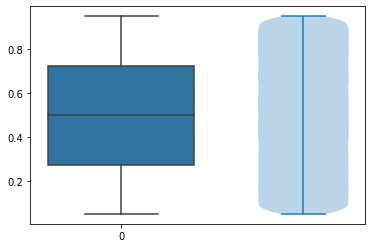

In [ ]:
sns.boxplot(raw_data['Mortality_Risk'])
plt.violinplot(raw_data['Mortality_Risk'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff155d51d30>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff155d51cd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff155d5f340>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff155d5f6a0>}

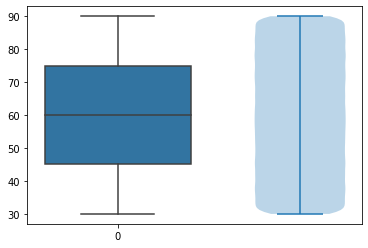

In [ ]:
sns.boxplot(raw_data['Age'])
plt.violinplot(raw_data['Age'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff110b05670>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff110b05610>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff110b05c40>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff110b05fa0>}

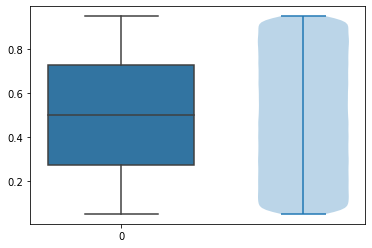

In [ ]:
sns.boxplot(raw_data['5_Year_Survival_Probability'])
plt.violinplot(raw_data['5_Year_Survival_Probability'])

In [ ]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

min_max_scaler.fit(raw_data[['Age']])

raw_data.Age = min_max_scaler.transform(raw_data[['Age']])

# balance the data

In [ ]:
## Split
from sklearn.model_selection import train_test_split

X = raw_data.drop('Final_Prediction', axis = 1)
y = raw_data[['Final_Prediction']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [ ]:
## Split
from sklearn.model_selection import train_test_split

X = raw_data.drop('Final_Prediction', axis = 1)
y = raw_data[['Final_Prediction']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

<AxesSubplot: xlabel='Final_Prediction'>

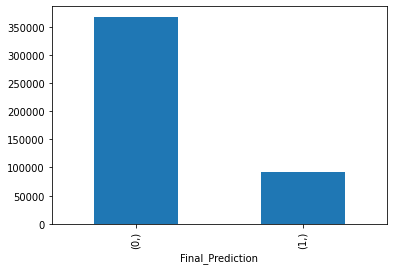

In [ ]:
y.value_counts().plot.bar()

<AxesSubplot: xlabel='Final_Prediction'>

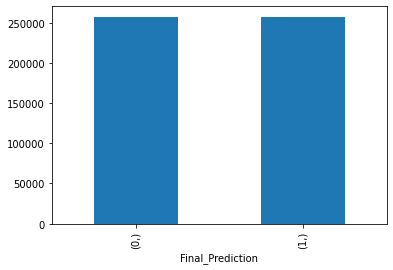

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 99)

X, y = smote.fit_resample(X_train,y_train)

#plot
y.value_counts().plot.bar()

# Models

In [ ]:
X

,Age,Gender,Smoking_Status,Second_Hand_Smoke,Air_Pollution_Exposure,Occupation_Exposure,Rural_or_Urban,Socioeconomic_Status,Healthcare_Access,Insurance_Coverage,...,Mortality_Risk,5_Year_Survival_Probability,Delay_in_Diagnosis,Family_History,Indoor_Smoke_Exposure,Tobacco_Marketing_Exposure,Mutation_Type_EGFR,Mutation_Type_KRAS,Mutation_Type_None,Country_target_enc
0,0.550000,0,2,1,1,0,1,0,2,1,...,0.132240,0.900650,0,0,1,0,0,0,0,0.198890
1,0.316667,1,2,0,0,1,0,0,1,1,...,0.211645,0.733695,0,1,0,0,1,0,0,0.194189
2,0.500000,0,0,1,2,0,1,1,2,1,...,0.144338,0.363728,0,0,0,1,1,0,0,0.199856
3,0.966667,1,1,1,1,0,1,1,2,0,...,0.708222,0.157360,0,0,0,0,1,0,0,0.197093
4,0.550000,0,2,1,2,0,0,2,2,0,...,0.151393,0.875635,0,0,0,0,0,0,1,0.194189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515213,0.375770,0,2,0,0,0,1,0,0,1,...,0.788637,0.713322,1,0,0,1,0,0,1,0.203393
515214,0.479093,1,0,1,0,0,0,0,2,0,...,0.551117,0.162987,1,0,0,0,0,0,0,0.200150
515215,0.603851,0,2,0,2,1,1,0,1,1,...,0.184365,0.568014,0,1,0,0,1,0,0,0.204040
515216,0.591893,1,1,1,0,0,1,1,1,1,...,0.536415,0.563113,0,1,0,0,0,1,0,0.204976


In [ ]:
y

,Final_Prediction
0,1
1,0
2,0
3,0
4,0
...,...
515213,1
515214,1
515215,1
515216,1


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [ ]:
# Create Decision Tree classifer object
DF_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
DF_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DF_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)           # Model Accuracy, how often is the classifier correct?
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7798480907832253
Precision: 0.7699106181617886
Recall: 0.7971743357096566


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
DT_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate RandomizedSearchCV()
DT_model = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(random_state = 2309805),
    n_iter = 300,
    param_distributions = DT_param_grid,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=-1,
    refit=True)

# Fit the object to our data
DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", DT_model.best_params_)
print("\nBest recall found: ", DT_model.best_score_)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)

y_pred = RF_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/var/folders/nl/xqdzltcd2fzgkw0y0vq310rr0000gn/T/ipykernel_1765/2368906212.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(X_train, y_train)


Accuracy: 0.8079590595603173
Precision: 0.8323135300130218
Recall: 0.7704860661049903


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
RF_param_grid = {'bootstrap': [True, False],
                 'max_depth': range(2,20,2),
                 'max_features': ['log2', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'criterion' : ['gini', 'entropy'],
                 'n_estimators': [50,100, 200, 300]}

KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate GridSearchCV() with clf and the parameter grid
RF_model = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state = 2309805),
    n_iter = 250,
    param_distributions = RF_param_grid,
    random_state = 2309805,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", RF_model.best_params_)
print("Best recall found: ", RF_model.best_score_)

# Logistic Regression

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model (using the default parameters)
LR_clf = LogisticRegression(random_state=99)

# fit the model with data
LR_clf.fit(X_train, y_train)

y_pred = LR_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5930540998667236
Precision: 0.586890243902439
Recall: 0.6237848347375243


In [ ]:
# load libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create the grid
LR_param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate the grid search object
LR_model = GridSearchCV(
	estimator = LogisticRegression(random_state = 2309805),
	param_grid = LR_param_grid,
	scoring = 'recall',
	n_jobs=2,
	cv = KFold_cv,
	refit = True,
  verbose = 0,
	return_train_score = True)

#Fit the object to our data
LR_model.fit(X_train, y_train)
# Make predictions
LR_y_pred = LR_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", LR_model.best_params_)
print("\nBest Recall found: ", LR_model.best_score_)

# K-Nearest Neighbours (KNN)

In [ ]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7363650479406856
Precision: 0.6726720743797733
Recall: 0.9190278677900194


In [ ]:
y_train.shape

(360652, 1)

In [ ]:
# Using Cross Validation to Get the Best Value of k
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5) # mean accuracy on the given test data and label
    scores.append(np.mean(score))

In [ ]:
# plot
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
#import cross validation score
from sklearn.model_selection import cross_val_score

## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
KNN_param_grid = {
    "n_neighbors": np.linspace(1, 30, 30).astype(int),
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": np.linspace(1, 50, 6).astype(int),
    "p": [1,2]
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate GridSearch() with clf and the parameter grid
KNN_model = RandomizedSearchCV(
    estimator = KNeighborsClassifier(),
    n_iter = 200,
    param_distributions =  KNN_param_grid,
    random_state = 2309805,
    cv = KFold_cv,
    verbose = 0,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
KNN_model.fit(X_train, y_train)
KNN_y_pred = KNN_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", KNN_model.best_params_)
print("Best recall found: ", KNN_model.best_score_)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Build a Gaussian Classifier
NB_clf = GaussianNB()

# Model training
NB_clf.fit(X_train, y_train)

# Predict Output
y_pred = NB_clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5978869867888151
Precision: 0.5794139139828219
Recall: 0.7091380427738172


In [ ]:
#import Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#create classifier object
nb = GaussianNB()

nb_accuracy = cross_val_score(nb,X_train,y_train.values.ravel(), cv=3, scoring ='accuracy')
nb_f1 = cross_val_score(nb,X_train,y_train.values.ravel(), cv=3, scoring ='f1')

print('nb_accuracy: ' +str(nb_accuracy))
print('nb F1_Macro Score: '+str(nb_f1))
print('nb_accuracy_avg: ' + str(nb_accuracy.mean()) +'  |  lr_f1_avg: '+str(nb_f1.mean()))

# SVM

In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
# Create a svm Classifier
SVM_clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
SVM_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = SVM_clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define a parameter grid with distributions of possible parameters to use
SVM_param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10],
    "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1],
}

# Create the cross validation object
KFold_cv = KFold(n_splits=10, shuffle=True, random_state=2309805)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
SVM_model = RandomizedSearchCV(
    estimator = svm.SVC(random_state = 2309805),
    n_iter = 40,
    param_distributions = SVM_param_grid,
    cv = KFold_cv,
    verbose = 0,
    random_state = 2309805,
    scoring = 'recall',
    n_jobs=2,
    refit=True)

# Fit the object to our data
SVM_model.fit(X_train, y_train)
SVM_y_pred = SVM_model.predict(X_test)

# Print the best parameters and highest accuracy
print("Best parameters found: ", SVM_model.best_params_)
print("\nBest recall found: ", SVM_model.best_score_)

# XGBoost

In [ ]:
total_time = time() - initial_time
total_time

11.25167727470398